# MACHINE LEARNING: REGRESSION 

- The aim of this course is to develop regression models to study the effect of eight input variables on two output variables - the heating and cooling load - of residential buildings.


- The data to be used are culled from the UCI Machine Learning Repository site. The Data Source for the content can be found [here](https://archive.ics.uci.edu/ml/datasets/Energy+efficiency) while the Data Quiz can be found [here](https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction)


- **Regression Analysis** is a modeling technique which is used to estimate the relationship between a dependent and an independent variable. While the dependent variable is usually referred to as the **target variable**, the independent variable also known as the **predictor variable**. The latter is used to estimate the value of the former.


- The due processes involved when conducting a regression analysis are highlighted below:

    - **STEP 1:** Identify the target and predictor variable(s).
    
    - **STEP 2:** Analyse and find the relationship between both variables.
    
    - **STEP 3:** Estimate the likely coefficients attributable to both variables.
    
    - **STEP 4:** Find the predicted values of the target variable.
    
    - **STEP 5:** Evaluate the accuracy of the relationship between the target and predictor variable(s).


- The major topics to be extensively explained under this topic are: 

    - The Simple Linear Regression Model
    
    - Collinearity and Assumptions for Linear Regression
    
    - Residual Sum of Squares and Cost Function Minimization
    
    - Coordinate Descent Algorithm and Gradient Descent
    
    - Multiple Regression and the Various Types
    
    - Techniques or Evaluation Metrics for Measuring Regression Performance
    
    - Regression Errors Penalization Methods
    
    - Non- Linear / Polynomial Regression Methods and Other Recommendations

### The Simple Linear Regression Model

- A Linear Regression Model simply examines the relationship between two variables - the target and predictor variables. This is the most commonly used form of regression where the relationship between the both variables are expressed using a straight line or **a line of best fit**


- A regression equation is expressed as: 

            Y = a + bx + e
            
    where a = intercept
          b = slope of the line of best fit
          e = error term
          x = predictor or independent variable
          Y = dependent or target variable


- Using the [Energy Efficiency Dataset](https://archive.ics.uci.edu/ml/datasets/Energy+efficiency), we want to conduct a simple linear regression using the *relative compactness column* as the **predictor variable** and the *Heating Load* column as the **target variable**.

     Relative_Compactness  Cooling_Load
158                  0.82         25.35
251                  0.86         31.28
631                  0.90         33.31
757                  0.66         17.79
689                  0.79         47.59
573                  0.62         17.21
553                  0.74         17.25
728                  0.86         29.69
183                  0.66         13.83
515                  0.69         14.60
460                  0.71         14.67
143                  0.62         14.24
258                  0.79         43.14
682                  0.86         36.21
62                   0.82         24.61


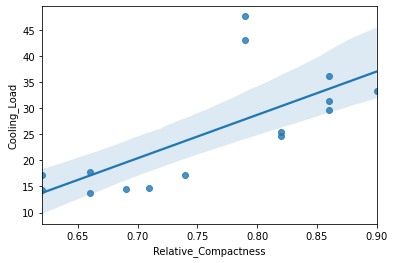

In [1]:
# to import all the necessary modules needed to execute our codes
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt 
import seaborn as sns
import csv
from csv import reader
# to read and import the excel file containing our data we need to use to execute our linear regression
dframe = pd.read_excel(r'C:\Users\USER\Documents\ONLINE COURSES\HAMOYE\ENB2012_data2.xlsx')
# to rename the column headings present in our dataset, we need to create a dictionary containing the values to replace the headings with
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area', 
                'X3':  'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height',
                'X6': 'Orientation', 'X7': 'Glazing_Area', 
                'X8': 'Glazing_Area_Distribution', 
                'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}
# Next, we use the pandas .rename method to replace the old column headings with the new headings 
dframe = dframe.rename(columns=column_names)
# to select a sample of the dataset to be used for our linear regression
simple_linear_reg_df = dframe[['Relative_Compactness','Cooling_Load']].sample(15, random_state=2)
print (simple_linear_reg_df)
# to create a regression plot using seaborn which we previously imported
sns.regplot(x='Relative_Compactness', y='Cooling_Load', data=simple_linear_reg_df)

In [2]:
# The describe() function comes with three parameters: percentile, include and exclude. The describe() function in Python 
# (Pandas) is used to get the statistical description of the dataframe such as the mean, standard deviation, interquartile range, 
# minimum and maximum values and so on. Because we want all our values to be used in generating our statistical summary, 
# we pass an argument ("all") to the 'include' parameter to tell it to include all values.

print (dframe.head())
print ('\n')
print (dframe.describe(include = 'all'))

   Relative_Compactness  Surface_Area  Wall_Area  Roof_Area  Overall_Height  \
0                  0.98         514.5      294.0     110.25             7.0   
1                  0.98         514.5      294.0     110.25             7.0   
2                  0.98         514.5      294.0     110.25             7.0   
3                  0.98         514.5      294.0     110.25             7.0   
4                  0.90         563.5      318.5     122.50             7.0   

   Orientation  Glazing_Area  Glazing_Area_Distribution  Heating_Load  \
0            2           0.0                          0         15.55   
1            3           0.0                          0         15.55   
2            4           0.0                          0         15.55   
3            5           0.0                          0         15.55   
4            2           0.0                          0         20.84   

   Cooling_Load  
0         21.33  
1         21.33  
2         21.33  
3         21.3

     Relative_Compactness  Cooling_Load
158                  0.82         25.35
251                  0.86         31.28
631                  0.90         33.31
757                  0.66         17.79
689                  0.79         47.59
573                  0.62         17.21
553                  0.74         17.25
728                  0.86         29.69
183                  0.66         13.83
515                  0.69         14.60
460                  0.71         14.67
143                  0.62         14.24
258                  0.79         43.14
682                  0.86         36.21
62                   0.82         24.61


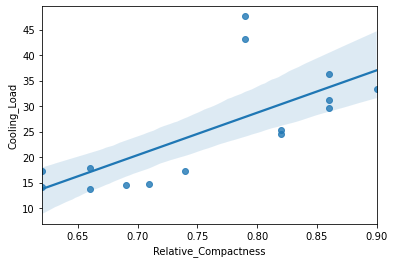

In [3]:
# an alternative method to plotting the simple linear regression for the selected data.
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt 
import seaborn as sns
import csv
from csv import reader
dframe = pd.read_excel(r'C:\Users\USER\Documents\ONLINE COURSES\HAMOYE\ENB2012_data2.xlsx')
# The difference between the first and second is that we apply the method of MAPPING here
dframe.columns = dframe.columns.map({'X1':'Relative_Compactness', 'X2': 'Surface_Area', 
                             'X3': 'Wall_Area', 'X4': 'Roof_Area', 
                             'X5': 'Overall_Height', 'X6': 'Orientation', 'X7': 'Glazing_Area', 
                             'X8': 'Glazing_Area_Distribution', 
                             'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'})
simple_linear_reg_df = dframe[['Relative_Compactness','Cooling_Load']].sample(15, random_state=2)
print (simple_linear_reg_df)
sns.regplot(x='Relative_Compactness', y='Cooling_Load', data=simple_linear_reg_df)

### Collinearity And Linear Regression Assumptions

- As stated earlier, there are two categories of variables used for regression - the predictor and the target variables. Based on this foundation, we can define collinearity.


- **COLLINEARITY** refers to the case where a strong relationship or correlation exists between two predictor variables.


- Normally, no relationship is meant to exist between predictor variables, but once there is, we refer to this scenario or case as collinearity. 


- The downside of an existing relationship between predictor variables is that they cannot be used independent of each other to predict the value(s) of the target variable. 


- There are certain basic assumptions that must be borne in mind while executing a regression operation on a selected dataset: 

 - **ASSUMPTION 1:** There must exist a casual relationship between the dependent and independent variables which is expressed as a linear function.
    
 - **ASSUMPTION 2:** The expected value of errors within a regression model is **zero**.
    
 - **ASSUMPTION 3:** The variance of errors does not depend on the value of the predictor variable i.e. errors have a constant variance along the regression line. This is a condition known as **Homoscedasticity**. The **Breausch-Pagan** test helps us test homoscedasticity and heterodasticity. 
    
 - **ASSUMPTION 4:** An error term of one observation is independent of the other. If not, we say that the data has an **auto-correlation problem**. The Durbin-Watson test is used to check the presence of correlation.
    
 - **ASSUMPTION 5:** Independent variables are uncorrelated and there is no presence of multicollinearity as it makes the estimated values unstable. **Note that** this was the point being referred to earlier when I defined collinearity.
    
 - **ASSUMPTION 6:** Errors follow normal distribution and we can execute this **NORMALITY TESTS**.

### Multiple Regression and Its Types

- Multiple regression helps us to analyse the relationship between one target variable and two or more predictor variables i.e. how a dependent variable is affected if one or more of the independent variables change. It is expressed with the following equation: 

            Y = a + bx + cx^2


- A situation where two or more predictor variables have strong correlation is referred to as **multicollinearity**. Multicollinearity occurs where least squares are unbiased and have large variances which are far from the true value.


- **Polynomial Regression** is a type of regression model whose power of the independent variable is greater than 1. Here, the line of best fit is a **curve** rather than a straight line.


- It is important to note that **the more predictor variables present within a regression model, the more complex the model is**.



### Methods Used for Estimating Regression Performance

- The major reason why we carry out a regression exercise on a dataset is to analyse and determine the relationship between the independent and dependent variables. To successfully do this, we need to make use of certain techniques which are explored below:

    - **Mean Absolute Percentage Error:** This is also called the Mean Absolute Error and it is used to calculate the sum of the average absolute error between the predicted and actual values. Simply put, it is used in calculating the average percentage deviation. **The smaller the MAPE, the better the model**. Thus, when MAPE is 0, then the model is perfect and contains absolutely accurate results which is an empirically impossible scenario. 


- Let us apply the MAPE in codes below:


In [25]:
# The first thing to do is to import the 'sklearn' module for the normalization of our dataset using the min-max scaler
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
scaler = MinMaxScaler()
features_dframe = normalised_dframe.drop(columns=['Heating_Load', 'Cooling_Load'])
normalised_dframe = pd.DataFrame(scaler.fit_transform(dframe), columns=dframe.columns)
heating_target = normalised_dframe['Heating_Load']


# The next step is DATA SPLITTING - where we split our dataset into the training and validation dataset. 
# Recall that we had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_dframe, heating_target, test_size=0.3, random_state=1)
linear_model = LinearRegression()

# Next, we fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)


# finally, we calculate the Mean Absolute Percentage Error
from sklearn.metrics import mean_absolute_error
mape = mean_absolute_error(y_test, predicted_values)
round(mape, 3)
# print (predicted_values)
# print ('\n')
# print (y_test)

0.063

- **Note that** when executing a linear regression operation, we need to split our dataset into the **TRAINING** and **VALIDATION** datasets. The Training Dataset is used in determining the Line of Best Fit (Model Building) while the  Estimation of the Accuracy of the Model (Evaluation Process) is done on the Validation Dataset.

    - **Residual Sum of Squares:** This is known as the sum of squared residuals and it is used to explain the variance in the representation of the dataset by the model i.e. how well the model approximates the data. The lower the RSS, the better the model's estimations and vice versa.
    A residual is defined as the difference between the nth true and nth predicted value given by the model. 
    
    Let us calculate the RSS for the *y_test* and the *predicted_values* in the codes below.

In [5]:
import numpy as np
Residual_sum = np.sum(np.square(y_test - predicted_values))
print (Residual_sum)
approximate_rss = round(Residual_sum, 2)
print (approximate_rss)
# print (y_test)
# print (predicted_values)

1.829717319338592
1.83


- **Root Mean Square Error(RMSE):** The RMSE is used to find the average of squared residuals i.e. the estimates of the standard deviation of the residuals. A low RMSE implies that the error made by the model only has a small deviation from the actual values while the opposite goes for a high RMSE. The RMSE is calculated as the **sum of the residual squares divided by the total number of observations**.


- Let us apply the RMSE formula on the y_test and predicted values which we have used in previous examples.

In [6]:
import numpy as np
from sklearn.metrics import mean_squared_error #importing the rmse module from sklearn 
root_mean_square_error = np.sqrt(mean_squared_error(y_test, predicted_values)) # applying the rmse formula on our dataset
print (round(root_mean_square_error,2)) # to print the rmse values for our dataset

0.09


- **R-Squared**: This is also known as the **Coefficient of Determination** of the model and it is used in calculating the percentage of variation in the target variable explained by the model. It is calculated as the **Explained Variance divided by the Total Variance**. 

- R-squared usually falls between 0% and 100%. **The higher the R-squared value, the better the model**.

- Using the selected variables, let us calculate the R-squared value. Remember that we need to **import the R-squared module** from the *sklearn* module.

In [7]:
import numpy as np
from sklearn.metrics import r2_score
r_squared = r2_score(y_test, predicted_values)
print (round(r_squared,2))

0.89


### Model Complexity, Overfitting and Underfitting

- After finding our R-squared value, we ought to find the **Adjusted R-squared** value. These two values need to be in close proximity of each other. If this isn't the case, the analysis may have **overfitted** the model and we may need to remove insignificant variables from the model. 


- **Model Complexity** refers to the number of variables - input data- used to train, develop and interpret the model. The more the variables used in a regression model, the more complex it becomes. Thus, we need to learn how to filter out insignificant variables from a model in order to make create more generalized results from our data.


- When we find a predictor variable to be exceptionally strong compared to other predictors within a regression model, they contribute to the high accuracy of the model, thus, leading to overfitting. When a model is overfitted, it performs well on the training data (yielding stellar results) but finds it difficult to perform effectively on the predicted data. In other words, it takes into consideration all inputs (include irrelevant data) and produces results based on them. 


- On the other hand, an underfitted data can be such if it is suffering from insufficient data elements / input to efficiently analyse or produce optimal results. 


- The **Occam's Razor** principle states that: *the simplest plausible explanation for a phenomenon is the best* i.e. the smallest model that fits a data effectively is the best. Multiple predictor variables introduce noise into the modeling process and affects the estimates of other variables. We need to learn how to create regression models which filter out noise or irrelevant data out of our variables and selects only the most critical variables and yields results based on them. This will be treated subsequently.

### Regression Errors Penalization Methods

- In the previous note, we discussed the meaning of an overfitted or an underfitted model and we stated their implications. To deal with these cases, we apply the method called **Regularization**. Regularization refers to the technique used in shrinking complex models or making them simpler by penalizing coefficients in the model towards zero and, invariably reducing overfitting within the model. There are two types of regression techniques: **Ridge and Lasso Regression.**


- **Ridge Regression:** This regression is used for analysing multiple regression data suffering from multicollinearity. As earlier defined, this is a case where least squares are unbiased and they have large variances which are far from the true value. **Ridge regression helps us to add a degree of bias to the estimates, reduce standard errors and invariably, give more reliable estimates.** This is also known as the **L2 Regularization.**
    
- **Feature Selection and LASSO (Least Absolute Shrinkage and Selection Operator) Regression:** Certain regression models contain a lot of irrelevant variables causing noise among the variables used to train our model and subsequently leading to a poor performing model. The process of filtering out the values that enable us create optimal models is known as FEATURE SELECTION. On the other hand, LASSO REGRESSION (also known as the L1 Regularization) helps us to reduce overfitting by penalizing irrelevant coefficients - reducing them to zero - thus performing an indirect feature selection and creating model analyses based on optimal variables. With Lasso, we can have a model which can be better interpreted without any complications. However, **a major downside to Lasso** is that **it fails to consider relevant factors when eliminating predictors from the model.**


- Let us write codes and penalize errors using the L1 and L2 Regularization respectively:

In [21]:
# using the L1 Regularization or Lasso Regression:
from sklearn.linear_model import Lasso
lasso_regression = Lasso(alpha = 0.001) # the alpha parameter is the constant that multiplies the L1 term and we reduce it to 0.001 to reduce under-fitting
print(lasso_regression.fit(x_train, y_train)) # the fit parameter is used to calculate the intercept or bias for the model

# using the L2 regularization or the Ridge Regression:
from sklearn.linear_model import Ridge
ridge_regression = Ridge(alpha = 0.5)
print(ridge_regression.fit(x_train, y_train))

# now, let us compare the effects which the regularization of our variables using the Ridge and Lasso regression have had on the model:
# let us define a function which returns the weight of the L1 and L2 regularizations:
def calc_weights_dframe(model, feature, column_name):
    weights = pd.Series(model.coef_, feature.columns).sort_values() # pd.Series is a one-dimensional ndarray with axis labels.
    weights_dframe = pd.DataFrame(weights).reset_index() # to reset the index of the DataFrame and use the default one instead
    weights_dframe.columns = ['Features',column_name] # to label the columns of a dataframe
    weights_dframe[column_name].round(2)
    return weights_dframe
# now we apply our created function to all three types of regression error penalization types:

linear_model_weights = calc_weights_dframe(linear_model, x_train, 'Linear_Model_Weight')
Ridge_reg_weights = calc_weights_dframe(ridge_regression, x_train, 'Ridge_reg_Weight')
Lasso_reg_weights = calc_weights_dframe(lasso_regression, x_train, 'Lasso_reg_Weight')

Total_weights = pd.merge(linear_model_weights, Ridge_reg_weights, on='Features') # the pd.merge function is used to merge DataFrame or Series based on a database style.
# the 'on' parameter in the pd.merge function helps us to tell Python the Column or Index level names where the Dataframe should be joined on.
# the pd.merge function can only join two dataframes at the same time based on the parameters: 'left' and 'right'. Hence the reason why we have to write our merge function twice to merge all three weights.

Final_weights = pd.merge(Total_weights, Lasso_reg_weights, on= 'Features')
print (Final_weights)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
                    Features  Linear_Model_Weight  Ridge_reg_Weight  \
0               Surface_Area        -5.619981e+12         -0.062277   
1       Relative_Compactness        -5.855361e-01         -0.283473   
2                Orientation         3.665924e-03          0.003369   
3  Glazing_Area_Distribution         2.824116e-02          0.029087   
4               Glazing_Area         2.150240e-01          0.212449   
5             Overall_Height         3.945312e-01          0.442467   
6                  Wall_Area         3.278322e+12          0.103060   
7                  Roof_Area         4.214986e+12         -0.163193   

   Lasso_reg_Weight  
0     

- Elastic Net Regression: This is another approach to penalising errors in our regression model. The Elastic Net Regression is a combination of the Ridge and Lasso Regression. The method is aimed at maintaining a balance between both methods and overcoming the shortcoming of the Lasso Regression method.
    By applying this technique, the feature selection process is performed automatically whilst taking into consideration the optimal predictor variables which would normally might have been eliminated when solely using the Lasso Regression method.

## NON-LINEAR REGRESSION METHODS AND OTHER RECOMMENDATIONS

- **Hyperparameters:** These are the parameters that define the make-up or structure of the model. These parameters contribute to the optimal performance of the model. 


- **Hyperparameter Tuning:** This is defined as the process of filtering through the hyperparameters to find those critical to the optimization of the model.


- There is a difference that lies between **model parameters** and **hyperparameters**: The former are used during the **training process** - where the model building and evaluation process is carried out - while the latter are used during the **validation phase** - where the model performance is assessed. The values which are derived at the end of the hyperparameter tuning are usually regarded as the optimal values for the dataset.


- There are two basic approaches to conducting hyperparameter tuning:

    - **Grid Search:** The grid search approach combines a cluster of parameters and for every parameter cluster, a model is built and evaluated until the optimal model is detected alongside the corresponding parameters. This is a relatively easy method for hyperparameter tuning although it can be expensive when setting up.
    
    - **Random Search:** Alternately, the random search technique combines random values/parameters within a model and executes the process of determining the model that yields the optimal result with the randomly selected parameters. The upside to this approach is that **it enables us to run through our parameters faster and completely to actually select the most compatible values that yield an optimal model.**
    

- **Data Splitting, Resampling and the Cross Validation Strategy**

    - **Data Splitting** is the process of splitting data into Training and Validation datasets. Both are used in the process of model building, data evaluation and data validation all aimed at determining the Line of Best Fit.
    
    - **Resampling** is the process of continually selecting samples from the given dataset for the purpose of obtaining more information about the dataset.
    
    - **Cross Validation** is a technique used in preventing overfitting and making generalizations in Machine Learning.
    
    